#Model evaluation - Standing

Connect to Google Drive, load libraries, reference

In [ ]:
#@title
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive
%cd /gdrive/MyDrive/CSC8635/

## set up the libraries that are needed to run the analysis
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import keras
import itertools
import re, time
import tensorflow as tf

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from keras.datasets import mnist
from keras.callbacks import TensorBoard
from keras.layers import Input, Dense
from keras.models import Model
from keras.regularizers import l2
from tensorflow.keras.utils import to_categorical

from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.utils import np_utils

from time import time
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score

from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

batch_size = 128
num_classes = 10
epochs = 5
from matplotlib import pyplot as plt
print("Tensorflow version " + tf.__version__)
AUTOTUNE = tf.data.AUTOTUNE
try: # detect TPUs
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver.connect() # TPU detection
    strategy = tf.distribute.TPUStrategy(tpu)
except ValueError: # detect GPUs
    strategy = tf.distribute.MirroredStrategy() # for GPU or multi-GPU machines
    #strategy = tf.distribute.get_strategy() # default strategy that works on CPU and single GPU
    #strategy = tf.distribute.experimental.MultiWorkerMirroredStrategy() # for clusters of multi-GPU machines
#print("Number of accelerators: ", strategy.num_replicas_in_sync)

#Based on code: https://www.kaggle.com/teaprint/my-analysis-on-motion-sensor-data

Mounted at /gdrive
/gdrive
/gdrive/MyDrive/CSC8635
Tensorflow version 2.7.0
INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:CPU:0',)


Load data

In [ ]:
#@title
#set up for machine learning
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline
from glob import glob
import sklearn
import tensorflow as tf

import os
#print(os.listdir("A_DeviceMotion_data/A_DeviceMotion_data"))

# Data Folders:
Folders = glob('A_DeviceMotion_data/A_DeviceMotion_data/*_*')
Folders = [s for s in Folders if "csv" not in s]

Df_all_list = []
Exp = 0
# Segment the data to 400 samples frames , each one will be a different experiment
Segment_Size = 400

# Activity types dict:
activity_codes = {'dws':1,'jog':2,'sit':3,'std':4,'ups':5,'wlk':6}        
activity_types = list(activity_codes.keys())

# Load All data:
for j  in Folders:
  Csv = glob(j + '/*' )
  for i in Csv:
    df = pd.read_csv(i)
    df['Activity'] = activity_codes[j[40:43]]
    df['Sub_Num'] = i[len(j)+5:-4]
    df['Exp_num'] = 1
    ExpNum = np.zeros((df.shape[0])) 
    for i in range(0,df.shape[0]-Segment_Size,Segment_Size):
      ExpNum[range(i,i+Segment_Size)] = i/Segment_Size +Exp*100 
    df['Exp_num'] = ExpNum
    #Df_all = pd.concat([Df_all,df])
    Df_all_list.append(df)
    Exp += 1        
Df_all = pd.concat(Df_all_list,axis=0)  
print(f'The data has been loaded.')
print(f'The dimensions of the complete dataset are {Df_all.shape}.')
print(f'The 16 column headers are {Df_all.columns}.')
#check unique values for the participants
#np.unique(Df_all['Sub_Num'])

The data has been loaded.
The dimensions of the complete dataset are (1412865, 16).
The 16 column headers are Index(['Unnamed: 0', 'attitude.roll', 'attitude.pitch', 'attitude.yaw',
       'gravity.x', 'gravity.y', 'gravity.z', 'rotationRate.x',
       'rotationRate.y', 'rotationRate.z', 'userAcceleration.x',
       'userAcceleration.y', 'userAcceleration.z', 'Activity', 'Sub_Num',
       'Exp_num'],
      dtype='object').


Select activity type (Standing = 4, 306427 rows)

In [ ]:
#@title
Standing = Df_all.loc[(Df_all['Activity'] >= 4)
                     & (Df_all['Activity'] < 5)]

In [ ]:
#@title
X = Standing.drop(['Exp_num','Unnamed: 0','Activity','Sub_Num'],axis=1)
Y = Standing['Sub_Num']
print('Shape of X:', X.shape)
print('Shape of Y:', Y.shape)

Shape of X: (306427, 12)
Shape of Y: (306427,)


###**Trial Participant**

Split data into train and test

In [ ]:
#@title
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

Scale data

In [ ]:
#@title
#scale the data

scaler = StandardScaler()
scaler.fit(X_train)
# Apply transform to both the training set and the test set.
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Train and test model

In [ ]:
#@title
t0=time()
LR_L1 = LogisticRegression(C=10, penalty='l2').fit(X_train, Y_train)
print('Logistic_regression (L1) - accuracy: {:.2f}, f1 score: {:.2f}, total_time: {:.2f} sec'.format(accuracy_score(Y_test, LR_L1.predict(X_test)),f1_score(Y_test,LR_L1.predict(X_test),average ='macro'), time()-t0))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Logistic_regression (L1) - accuracy: 0.68, f1 score: 0.67, total_time: 41.00 sec


In [ ]:
#@title
t0=time()
LR_L2 = LogisticRegression(C=100, penalty='l2').fit(X_train, Y_train)
print('Logistic_regression (L2) - accuracy: {:.2f}, f1 score: {:.2f}, total_time: {:.2f} sec'.format(accuracy_score(Y_test, LR_L2.predict(X_test)),f1_score(Y_test,LR_L1.predict(X_test),average ='macro'), time()-t0))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Logistic_regression (L2) - accuracy: 0.68, f1 score: 0.67, total_time: 41.08 sec


In [ ]:
#@title
t0=time()
DT = DecisionTreeClassifier(criterion='entropy').fit(X_train, Y_train)
print('Decision Tree - accuracy: {:.2f}, f1 score: {:.2f}, total_time: {:.2f} sec'.format(accuracy_score(Y_test, DT.predict(X_test)),f1_score(Y_test,DT.predict(X_test),average ='macro'), time()-t0))

Decision Tree - accuracy: 0.98, f1 score: 0.98, total_time: 19.10 sec


Decision tree accuracy: 0.9809853256317376


<Figure size 432x288 with 0 Axes>

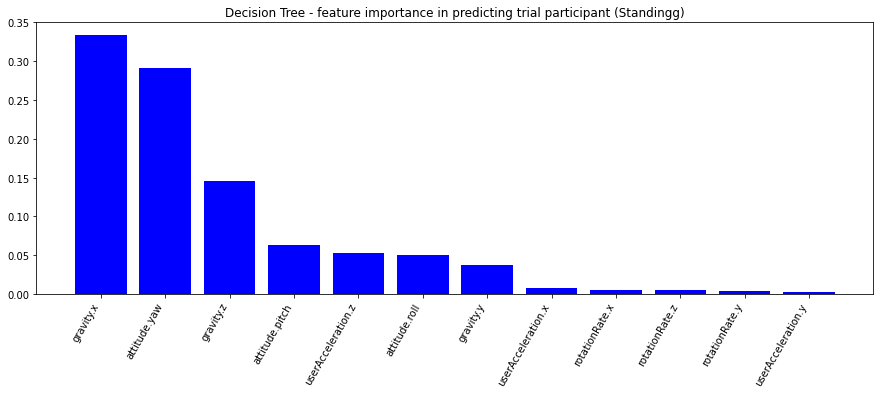

In [ ]:
#@title
feature_names = X.columns
X_names = feature_names

# for tree-based classifier's feature importance plotting
def plot_keyFeat_trees(classifier, feature_names, clf_id, top_features=10):
    importances = classifier.feature_importances_
    indices = np.argsort(importances)[::-1]
    indices_vis = indices[:top_features]
    
    plt.figure()
    plt.figure(figsize=(15, 5))
    plt.title(clf_id)
    plt.bar(range(top_features), importances[indices_vis],
       color="b", align="center")
    plt.xticks(range(top_features), indices)
    plt.xlim([-1, top_features])
    feature_names = np.array(feature_names)
    plt.xticks(np.arange(0, top_features), feature_names[indices_vis], rotation=60, ha='right')
    plt.show()

print('Decision tree accuracy:',accuracy_score(Y_test, DT.predict(X_test)))
plot_keyFeat_trees(DT, X_names, 'Decision Tree - feature importance in predicting trial participant (Standingg)', top_features=12)

In [ ]:
#@title
t0=time()
clf = KNeighborsClassifier(5)
KNN = clf.fit(X_train, Y_train)
print('K- Nearest Neighbour  - accuracy: {:.2f}, f1 score: {:.2f}, total_time: {:.2f} sec'.format(accuracy_score(Y_test, KNN.predict(X_test)),f1_score(Y_test,KNN.predict(X_test),average ='macro'), time()-t0))


K- Nearest Neighbour  - accuracy: 0.94, f1 score: 0.94, total_time: 93.96 sec


###**Gender**

Mapping for gender (1 for male, 0 for female)

In [ ]:
#@title
mapping = {
    '1': 1,
    '2': 1,
    '3': 0,
    '4': 1,
    '5': 0,
    '6':1,
    '7':0,
    '8':0,
    '9':1,
    '10':0,
    '11':1,
    '12':1,
    '13':1,
    '14':1,
    '15':1,
    '16':0,
    '17':1,
    '18':0,
    '19':0,
    '20':1,
    '21':1,
    '22':1,
    '23':0,
    '24':0

}

In [ ]:
#@title
# Create gender labels
Y2 = [mapping[i] for i in Standing['Sub_Num']]

Prepare training and test data sets, apply scaling

In [ ]:
#@title
X_train, X_test, Y_train, Y_test = train_test_split(X, Y2, test_size=0.3, random_state=0)

scaler = StandardScaler()
scaler.fit(X_train)
# Apply transform to both the training set and the test set.
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Train and test models, print evaluation results

In [ ]:
#@title
t0=time()
LR_L1 = LogisticRegression(C=10, penalty='l2').fit(X_train, Y_train)
print('Logistic_regression (L1) - accuracy: {:.2f}, f1 score: {:.2f}, total_time: {:.2f} sec'.format(accuracy_score(Y_test, LR_L1.predict(X_test)),f1_score(Y_test,LR_L1.predict(X_test),average ='macro'), time()-t0))

Logistic_regression (L1) - accuracy: 0.73, f1 score: 0.72, total_time: 1.08 sec


In [ ]:
#@title
t0=time()
LR_L2 = LogisticRegression(C=100, penalty='l2').fit(X_train, Y_train)
print('Logistic_regression (L2) - accuracy: {:.2f}, f1 score: {:.2f}, total_time: {:.2f} sec'.format(accuracy_score(Y_test, LR_L2.predict(X_test)),f1_score(Y_test,LR_L1.predict(X_test),average ='macro'), time()-t0))

Logistic_regression (L2) - accuracy: 0.73, f1 score: 0.72, total_time: 1.07 sec


In [ ]:
#@title
t0=time()
DT = DecisionTreeClassifier(criterion='entropy').fit(X_train, Y_train)
print('Decision Tree - accuracy: {:.2f}, f1 score: {:.2f}, total_time: {:.2f} sec'.format(accuracy_score(Y_test, DT.predict(X_test)),f1_score(Y_test,DT.predict(X_test),average ='macro'), time()-t0))

Decision Tree - accuracy: 0.99, f1 score: 0.99, total_time: 7.10 sec


In [ ]:
#@title
t0=time()
clf = KNeighborsClassifier(5)
KNN = clf.fit(X_train, Y_train)
print('K- Nearest Neighbour  - accuracy: {:.2f}, f1 score: {:.2f}, total_time: {:.2f} sec'.format(accuracy_score(Y_test, KNN.predict(X_test)),f1_score(Y_test,KNN.predict(X_test),average ='macro'), time()-t0))

K- Nearest Neighbour  - accuracy: 0.98, f1 score: 0.98, total_time: 89.12 sec


Show results of model performance by gender identification

###**Weight**

Mapping - above the average weight 72.125kg are labeled as 1; 0 for below average.

In [ ]:
#@title
mapping = {
    '1': 1,
    '2': 0,
    '3': 0,
    '4': 1,
    '5': 0,
    '6':1,
    '7':0,
    '8':0,
    '9':1,
    '10':0,
    '11':0,
    '12':0,
    '13':0,
    '14':0,
    '15':0,
    '16':1,
    '17':1,
    '18':0,
    '19':1,
    '20':1,
    '21':0,
    '22':1,
    '23':0,
    '24':1

}

In [ ]:
#@title
# Create weight labels
Y3 = [mapping[i] for i in Standing['Sub_Num']]

Split training and test data, scale data

In [ ]:
#@title
X_train, X_test, Y_train, Y_test = train_test_split(X, Y3, test_size=0.3, random_state=0)

scaler = StandardScaler()
scaler.fit(X_train)
# Apply transform to both the training set and the test set.
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Evaluate model performance

In [ ]:
#@title
t0=time()
LR_L1 = LogisticRegression(C=10, penalty='l2').fit(X_train, Y_train)
print('Logistic_regression (L1) - accuracy: {:.2f}, f1 score: {:.2f}, total_time: {:.2f} sec'.format(accuracy_score(Y_test, LR_L1.predict(X_test)),f1_score(Y_test,LR_L1.predict(X_test),average ='macro'), time()-t0))

Logistic_regression (L1) - accuracy: 0.63, f1 score: 0.61, total_time: 1.22 sec


In [ ]:
#@title
t0=time()
LR_L2 = LogisticRegression(C=100, penalty='l2').fit(X_train, Y_train)
print('Logistic_regression (L2) - accuracy: {:.2f}, f1 score: {:.2f}, total_time: {:.2f} sec'.format(accuracy_score(Y_test, LR_L2.predict(X_test)),f1_score(Y_test,LR_L1.predict(X_test),average ='macro'), time()-t0))

Logistic_regression (L2) - accuracy: 0.63, f1 score: 0.61, total_time: 1.19 sec


In [ ]:
#@title
t0=time()
DT = DecisionTreeClassifier(criterion='entropy').fit(X_train, Y_train)
print('Decision Tree - accuracy: {:.2f}, f1 score: {:.2f}, total_time: {:.2f} sec'.format(accuracy_score(Y_test, DT.predict(X_test)),f1_score(Y_test,DT.predict(X_test),average ='macro'), time()-t0))

Decision Tree - accuracy: 0.99, f1 score: 0.99, total_time: 7.06 sec


In [ ]:
#@title
t0=time()
clf = KNeighborsClassifier(5)
KNN = clf.fit(X_train, Y_train)
print('K- Nearest Neighbour  - accuracy: {:.2f}, f1 score: {:.2f}, total_time: {:.2f} sec'.format(accuracy_score(Y_test, KNN.predict(X_test)),f1_score(Y_test,KNN.predict(X_test),average ='macro'), time()-t0))

K- Nearest Neighbour  - accuracy: 0.97, f1 score: 0.97, total_time: 89.41 sec


###**Age**

Mapping - subjects above the average age of 28.79 are labeled as 1; 0 for below average

In [ ]:
#@title
mapping = {
    '1': 1,
    '2': 0,
    '3': 0,
    '4': 1,
    '5': 0,
    '6':0,
    '7':1,
    '8':0,
    '9':1,
    '10':1,
    '11':0,
    '12':1,
    '13':1,
    '14':1,
    '15':1,
    '16':1,
    '17':0,
    '18':0,
    '19':0,
    '20':0,
    '21':0,
    '22':1,
    '23':0,
    '24':0

}


In [ ]:
#@title
# Create age labels
Y4 = [mapping[i] for i in Standing['Sub_Num']]

Split data into training and test, then scale

In [ ]:
#@title
X_train, X_test, Y_train, Y_test = train_test_split(X, Y4, test_size=0.3, random_state=0)

scaler = StandardScaler()
scaler.fit(X_train)
# Apply transform to both the training set and the test set.
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Evaluate models

In [ ]:
#@title
t0=time()
LR_L1 = LogisticRegression(C=10, penalty='l2').fit(X_train, Y_train)
print('Logistic_regression (L1) - accuracy: {:.2f}, f1 score: {:.2f}, total_time: {:.2f} sec'.format(accuracy_score(Y_test, LR_L1.predict(X_test)),f1_score(Y_test,LR_L1.predict(X_test),average ='macro'), time()-t0))

Logistic_regression (L1) - accuracy: 0.70, f1 score: 0.69, total_time: 0.84 sec


In [ ]:
#@title
t0=time()
LR_L2 = LogisticRegression(C=100, penalty='l2').fit(X_train, Y_train)
print('Logistic_regression (L2) - accuracy: {:.2f}, f1 score: {:.2f}, total_time: {:.2f} sec'.format(accuracy_score(Y_test, LR_L2.predict(X_test)),f1_score(Y_test,LR_L1.predict(X_test),average ='macro'), time()-t0))

Logistic_regression (L2) - accuracy: 0.70, f1 score: 0.69, total_time: 0.87 sec


In [ ]:
#@title
t0=time()
DT = DecisionTreeClassifier(criterion='entropy').fit(X_train, Y_train)
print('Decision Tree - accuracy: {:.2f}, f1 score: {:.2f}, total_time: {:.2f} sec'.format(accuracy_score(Y_test, DT.predict(X_test)),f1_score(Y_test,DT.predict(X_test),average ='macro'), time()-t0))

Decision Tree - accuracy: 0.99, f1 score: 0.99, total_time: 7.75 sec


In [ ]:
#@title
t0=time()
clf = KNeighborsClassifier(5)
KNN = clf.fit(X_train, Y_train)
print('K- Nearest Neighbour  - accuracy: {:.2f}, f1 score: {:.2f}, total_time: {:.2f} sec'.format(accuracy_score(Y_test, KNN.predict(X_test)),f1_score(Y_test,KNN.predict(X_test),average ='macro'), time()-t0))

K- Nearest Neighbour  - accuracy: 0.97, f1 score: 0.97, total_time: 94.09 sec


###**Height**

Mapping - the trail participants with above average height of 174.2cm are labeled as 1; 0 for below average

In [ ]:
#@title
mapping = {
    '1': 1,
    '2': 1,
    '3': 0,
    '4': 1,
    '5': 0,
    '6':1,
    '7':1,
    '8':0,
    '9':1,
    '10':0,
    '11':1,
    '12':0,
    '13':1,
    '14':1,
    '15':1,
    '16':0,
    '17':1,
    '18':0,
    '19':0,
    '20':1,
    '21':0,
    '22':1,
    '23':0,
    '24':0

}


In [ ]:
#@title
# Create age labels
Y5 = [mapping[i] for i in Standing['Sub_Num']]

Split training and test data, then scale data

In [ ]:
#@title
X_train, X_test, Y_train, Y_test = train_test_split(X, Y5, test_size=0.3, random_state=0)

Evaluate model performance

In [ ]:
#@title
t0=time()
LR_L1 = LogisticRegression(C=10, penalty='l2').fit(X_train, Y_train)
print('Logistic_regression (L1) - accuracy: {:.2f}, f1 score: {:.2f}, total_time: {:.2f} sec'.format(accuracy_score(Y_test, LR_L1.predict(X_test)),f1_score(Y_test,LR_L1.predict(X_test),average ='macro'), time()-t0))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Logistic_regression (L1) - accuracy: 0.72, f1 score: 0.72, total_time: 3.78 sec


In [ ]:
#@title
t0=time()
LR_L2 = LogisticRegression(C=100, penalty='l2').fit(X_train, Y_train)
print('Logistic_regression (L2) - accuracy: {:.2f}, f1 score: {:.2f}, total_time: {:.2f} sec'.format(accuracy_score(Y_test, LR_L2.predict(X_test)),f1_score(Y_test,LR_L1.predict(X_test),average ='macro'), time()-t0))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Logistic_regression (L2) - accuracy: 0.73, f1 score: 0.72, total_time: 3.94 sec


In [ ]:
#@title
t0=time()
DT = DecisionTreeClassifier(criterion='entropy').fit(X_train, Y_train)
print('Decision Tree - accuracy: {:.2f}, f1 score: {:.2f}, total_time: {:.2f} sec'.format(accuracy_score(Y_test, DT.predict(X_test)),f1_score(Y_test,DT.predict(X_test),average ='macro'), time()-t0))

Decision Tree - accuracy: 0.99, f1 score: 0.99, total_time: 6.70 sec


In [ ]:
#@title
t0=time()
clf = KNeighborsClassifier(5)
KNN = clf.fit(X_train, Y_train)
print('K- Nearest Neighbour  - accuracy: {:.2f}, f1 score: {:.2f}, total_time: {:.2f} sec'.format(accuracy_score(Y_test, KNN.predict(X_test)),f1_score(Y_test,KNN.predict(X_test),average ='macro'), time()-t0))

K- Nearest Neighbour  - accuracy: 0.99, f1 score: 0.99, total_time: 14.95 sec


##**Summary**

Performance of the models varied significantly with the Decision Tree Classification Model marginally more accurate than K- Nearest Neighbour, having the highest accuracy for each variable. Models ranged in accuracy of predicting gender 73% to 99%, height 72% to 99%, age 70% to 99% and weight from 63% to 99% accuracy.